In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline

In [10]:
df = pd.read_csv("Mall_Customers.csv")

In [11]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.drop(["CustomerID","Genre","Age"],axis=1,inplace=True)

In [14]:
scaler = MinMaxScaler()
model = KMeans()


In [35]:
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),  # Scale features to a range
    ("kmeans", KMeans(n_clusters=5, random_state=42))  # KMeans clustering
])

In [36]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [37]:
X=df

In [38]:
pipeline.fit(X)

/Users/amanmehra/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [39]:
y_pred = pipeline.predict(X)

In [40]:
df["Cluster"] = y_pred

In [41]:
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,0
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,0


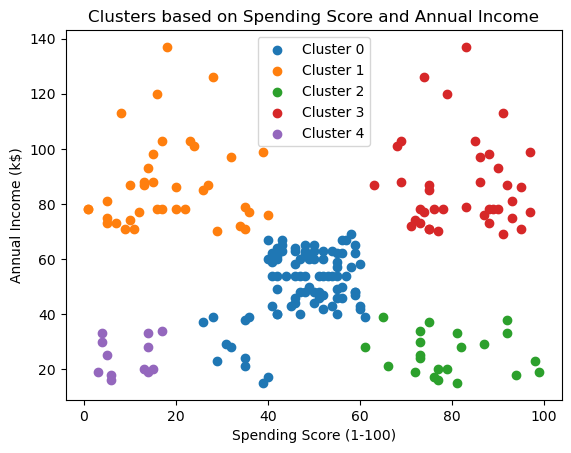

In [50]:
spending = df['Spending Score (1-100)']
income = df['Annual Income (k$)']
cluster = df['Cluster']
for i in range(cluster.nunique()):
    plt.scatter(spending[cluster == i], income[cluster == i], label=f'Cluster {i}')
    plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Clusters based on Spending Score and Annual Income')
plt.legend()

plt.show()